In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
from PIL import Image

In [2]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Traceback (most recent call last):
  File "/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/mysql/connector/connection_cext.py", line 233, in _open_connection
    self._cmysql.connect(**cnx_kwargs)
_mysql_connector.MySQLInterfaceError: Can't connect to MySQL server on 'localhost' (61)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py", line 16, in <module>
    (allusers, tweets, bigfive) = db.get_all_tweets()
  File "/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/database/MySQLConnect.py", line 246, in get_all_tweets
    connection, cursor = __get_connection()
  File "/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/database/MySQLConnect.py", line 6, in __get_connection
    connection = mysql.connector.connect(host="localhost", user="root", passwd="root", d

In [3]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')

In [4]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    tweets_pd.columns = ['id', 'id_str_twitter', "text", "created_at", 'favorite_count', 'retweet_count', 'lang',
                         "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity", 'text_updated', 'is_retweet', 'retweet_updated']
 
    return tweets_pd

In [5]:
def create_line_plot(tweets, id_user, count):
    fig, ax = plt.subplots(figsize=(30, 12))

    tweets["created_at"] = pd.to_datetime(tweets["created_at"])
    tweets['date_minus_time'] = tweets["created_at"].apply(lambda tweets : datetime.datetime(year=tweets.year, month=tweets.month, day=tweets.day))
    tweets.set_index(tweets["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(tweets['final_score'].resample('D').mean())

    x = new_df.index
    y = new_df['final_score']

    ran = range(0, len(x), 15)

    x_ticks = new_df.index[ran]

    plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=18)
    plt.xticks(x_ticks, rotation='vertical', fontsize=18)

    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.xlabel('Day', fontsize=16)
    plt.ylabel('Polarity Score', fontsize=16)

    plt.title("Tweets polarity per day - Participant {} - User {}".format(count, id_user), fontsize=30, pad = 20)
    plt.ylabel("Polarity", fontsize=26, labelpad = 10)
    plt.xlabel("Days", fontsize=26, labelpad = 10)

    # plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    # min_ylim, max_ylim = plt.ylim()
    # plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.margins(x=0.02)
    plt.tight_layout()
    plt.plot(x,y)

In [6]:
count = 1
all_tweets = pd.DataFrame()
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets = create_tweets_pd(data, id_user)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang',
                             "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                            "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                            "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                            "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                            'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]

        tweets['Participant'] = count
        if all_tweets.empty:
            all_tweets = tweets
        else:
            all_tweets = all_tweets.append(tweets)
        
        count += 1
    
# print(all_tweets)
# sns.relplot(x="created_at", y="final_score", hue="final_polarity", row="id_user",
#             kind="line", data=all_tweets);

In [7]:
tweets = create_tweets_pd(data, 26)
columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang', "id_user",
                     "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                    "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                    "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                    "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                    'text_updated', 'is_retweet', 'retweet_updated']

for c in columns_to_delete:
    del tweets[c]
    
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil"
url,None,https://t.co/gX4oRZWHg3,https://t.co/KkaPlVH4Wu,https://t.co/hDni4Fh2Ng,https://t.co/YJQuDtv2YW,https://t.co/3yZ94QNQvs,https://t.co/MtUeSEBICu,https://t.co/QU71LJgSuD,None,https://t.co/AmkOKWlftK,https://t.co/JWBzdmQOcV,https://t.co/yPuEuh1bn9,https://t.co/Uhw9rEUK2v,None,None,https://t.co/9cS34v6hKc


In [8]:
def create_boxplot_chart_data(is_percent):
    bar_chart_data = []

    count = 1
    for i in data:
        if data[i]['bigfive']:
            tweets = create_tweets_pd(data, i)
            columns_to_delete = ['id', 'id_str_twitter', "text", 'created_at', 'favorite_count', 'retweet_count', 'lang', "id_user",
                             "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                            "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                            "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                            "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                            'text_updated', 'is_retweet', 'retweet_updated']

            for c in columns_to_delete:
                del tweets[c]

            if is_percent == True:
                d = ['P{}'.format(count),
                     (len(tweets.query("final_polarity == 'pos'")) / len(tweets)) * 100,
                     (len(tweets.query("final_polarity == 'neu'")) / len(tweets)) * 100,
                     (len(tweets.query("final_polarity == 'neg'")) / len(tweets)) * 100
                    ]
            else:
                d = ['P{}'.format(count), len(tweets.query("final_polarity == 'pos'")),
                     len(tweets.query("final_polarity == 'neu'")), 
                     len(tweets.query("final_polarity == 'neg'"))]
            bar_chart_data.append(d)
            count += 1

    if is_percent == True:
        df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
    else:
        df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
    return df

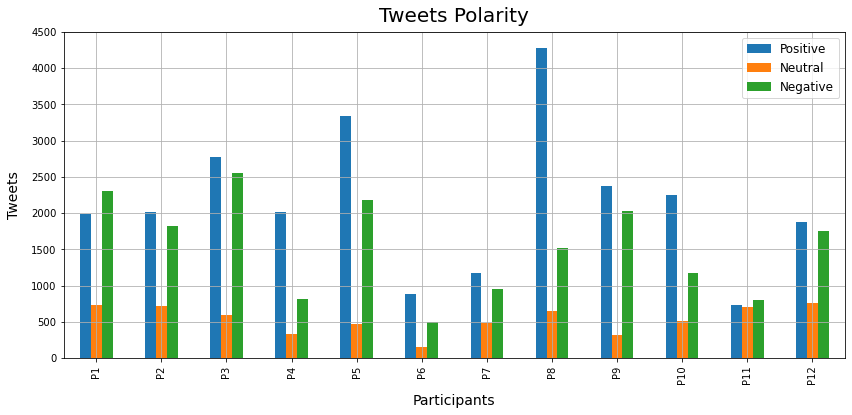

In [9]:
# multiple bar plots

df = create_boxplot_chart_data(False)
# df.head()
y_range = range(0,4501, 500)
df.plot(yticks = y_range, x="Participant", y=["pos", "neu", "neg"], kind="bar",figsize=(14,6))

plt.legend(["Positive", "Neutral", "Negative"], fontsize=12)
plt.title('Tweets Polarity', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=14, labelpad=10)
plt.ylabel('Tweets', fontsize=14, labelpad=10)
plt.grid(True)

plt.show()

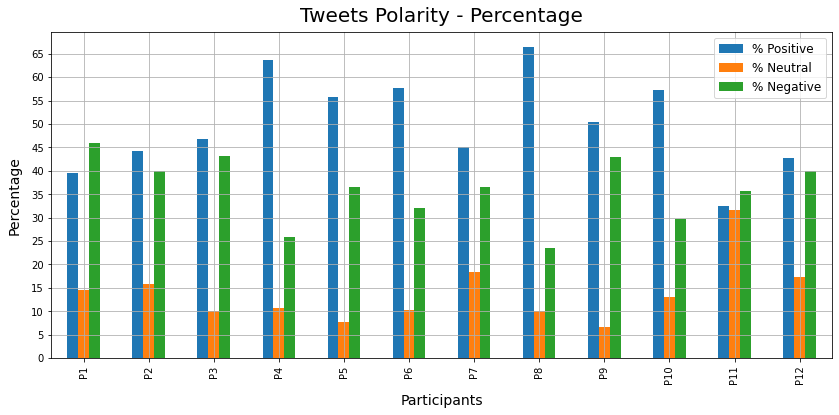

In [10]:
# multiple line plots

df = create_boxplot_chart_data(True)

y_range = range(0, 70, 5)
# df.head()
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,6))


plt.legend(['% Positive', '% Neutral', '% Negative'], fontsize=12)
plt.title('Tweets Polarity - Percentage', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=14, labelpad=10)
plt.ylabel('Percentage', fontsize=14, labelpad=10)
plt.grid(True)

plt.show()

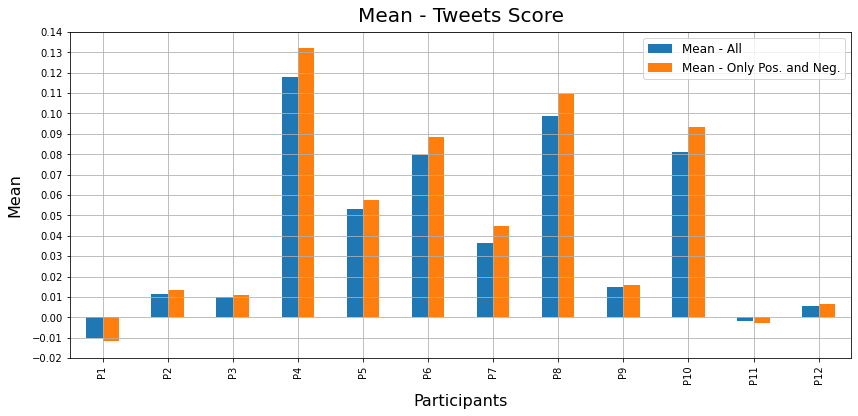

In [11]:
# multiple bar plots with means

bar_chart_data = []

y_range = np.arange(-0.02, 0.15, 0.01) 

count = 1
for i in data:
    if data[i]['bigfive']:
        tweets = create_tweets_pd(data, i)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'created_at', 'favorite_count', 'retweet_count', 'lang', "id_user",
                         "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                        "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                        "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                        "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                        'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]    

        d = ['P{}'.format(count), 
             tweets['final_score'].mean(),
             tweets.query("final_polarity != 'neu'")['final_score'].mean()
            ]

        bar_chart_data.append(d)
        count += 1

df = pd.DataFrame(bar_chart_data, columns=["Participant","mean_all","mean_posneg"])
df.plot(yticks = y_range, x="Participant", y=["mean_all", "mean_posneg"], kind="bar",figsize=(14,6))

plt.legend(["Mean - All", "Mean - Only Pos. and Neg."], fontsize=12)
plt.title('Mean - Tweets Score', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=16, labelpad=10)
plt.ylabel('Mean', fontsize=16, labelpad=10)
plt.grid(True)

plt.show()

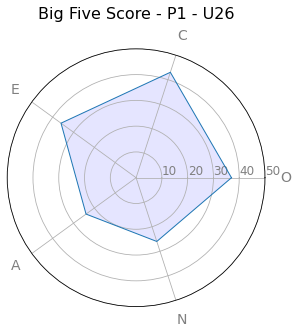

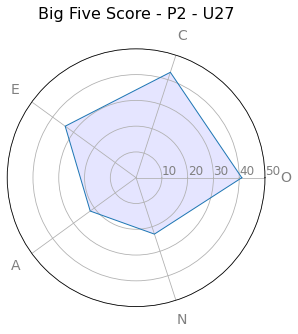

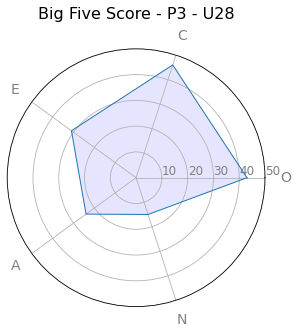

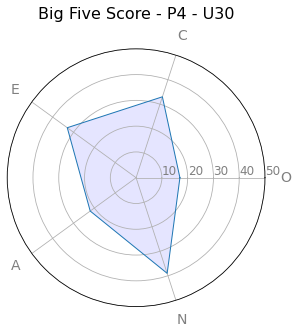

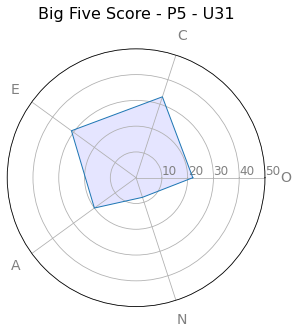

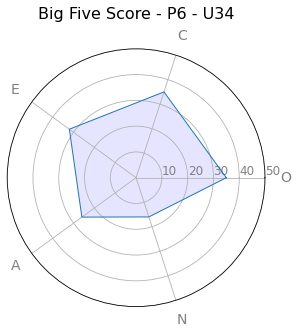

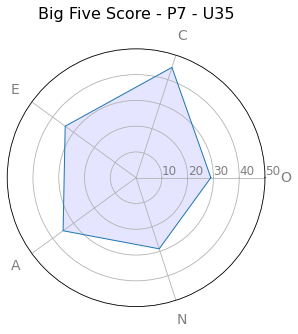

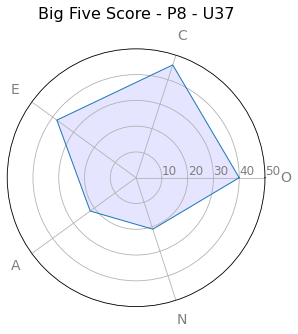

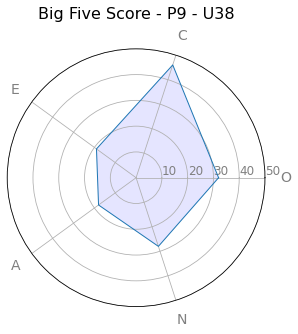

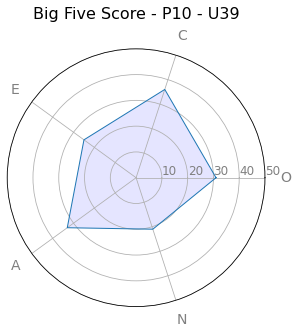

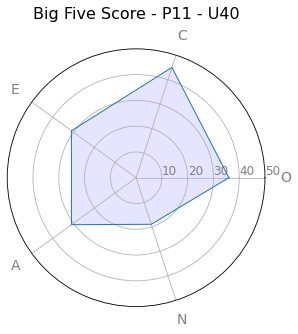

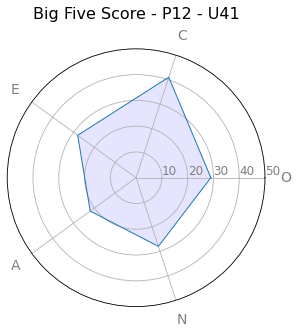

In [67]:
count = 1

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'id_user']
        o = b['O']
        c = b['C']
        e = b['E']
        a = b['A']
        n = b['N']
        
        df = pd.DataFrame({
        'group': ['A'],
        'O': o,
        'C': c,
        'E': e,
        'A': a,
        'N': n
        })
        
        # number of variable
        categories=list(df)[1:]
        N = len(categories)

        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values=df.loc[0].drop('group').values.flatten().tolist()
        values += values[:1]

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]


        fig = plt.figure(figsize=(8, 6))
        gs = GridSpec(nrows=1, ncols=2)

        # Initialise the spider plot
        ax = fig.add_subplot(gs[0, 0])
        ax = plt.subplot(121, polar=True)

        # Draw one axe per variable + add labels
        plt.xticks(angles[:-1], categories, color='grey', size=14)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([10,20,30, 40, 50], ["10","20","30", '40', '50'], color="grey", size=12)
        plt.ylim(0,50)
        
        ax.tick_params(pad=10)

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)

        plt.title('Big Five Score - P{} - U{}'.format(count, d), fontsize=16, pad = 30)

        plt.tight_layout()

#         Show the graph
        plt.show()
        
#         fig.savefig('images/polar_ocean_p{}_u{}.png'.format(count, d), bbox_inches='tight')

        count += 1

[Text(1, 0, 'Positive'), Text(2, 0, 'Negative'), Text(3, 0, 'Neutral')]

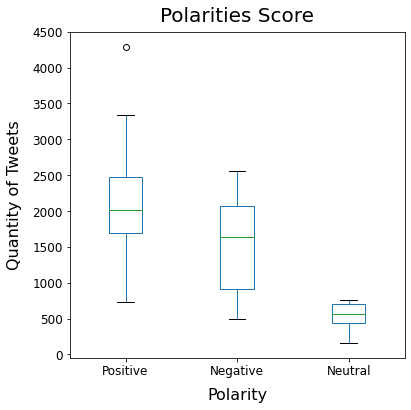

In [64]:
df = create_boxplot_chart_data(False)

bplot = df.boxplot(column=['pos', 'neg', 'neu'], grid=False, figsize=(6,6))
y_range = range(0,4501, 500)

bplot.axes.set_title("Polarities Score", fontsize=20, pad = 10)
 
bplot.set_xlabel("Polarity", fontsize=16, labelpad=10) 
bplot.set_ylabel("Quantity of Tweets", fontsize=16, labelpad=10)
bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_xticklabels(['Positive', 'Negative', 'Neutral'])

[Text(1, 0, 'Positive (%)'),
 Text(2, 0, 'Negative (%)'),
 Text(3, 0, 'Neutral (%)')]

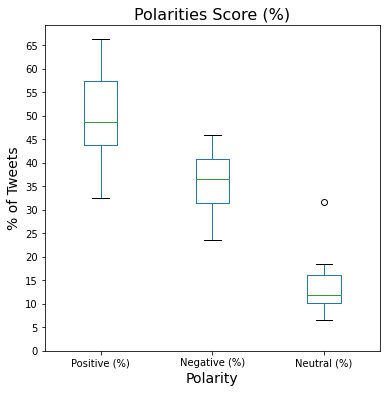

In [66]:
df = create_boxplot_chart_data(True)

bplot = df.boxplot(column=['por_pos', 'por_neg', 'por_neu'], grid=False, figsize=(6,6))
y_range = range(0, 70, 5)

bplot.axes.set_title("Polarities Score (%)", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("% of Tweets", fontsize=14)
bplot.set_yticks(y_range)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive (%)', 'Negative (%)', 'Neutral (%)'])

In [69]:
def create_line_plot(df_result, id_user, count):

    x = df_result["YearMonth"]
    y = df_result["text"]

    tickvalues = range(0,len(x))

    fig = plt.figure(figsize=(14,3.5))

    plt.xticks(ticks = tickvalues ,labels = x, rotation = 'vertical')

    plt.title("Quantity Tweets per Month - P{} - U{}".format(count, id_user))
    plt.ylabel("Quantity of Tweets", fontsize=12)
    plt.xlabel("Months", fontsize=12)

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*1.1, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

In [70]:
def create_histogram(df_result, id_user, count):

    x = df_result["YearMonth"]
    y = df_result["text"]
    
    fig = plt.figure(figsize=(15,3.5))

    n, bins, patches = plt.hist(y, bins='auto', color='#5643fd')

    plt.xticks(np.arange(0, 1000, 50))

    plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(y.mean()))

    plt.title('Tweets Frequency per Month - P{} - U{}'.format(count, id_user))
    plt.xlabel('Quantity of Tweets')
    plt.ylabel('Frequency')

    plt.show()

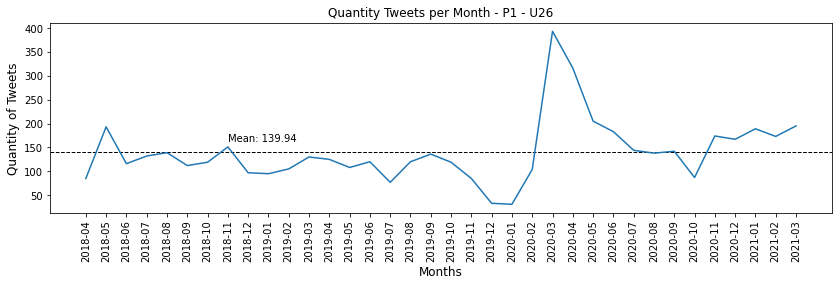

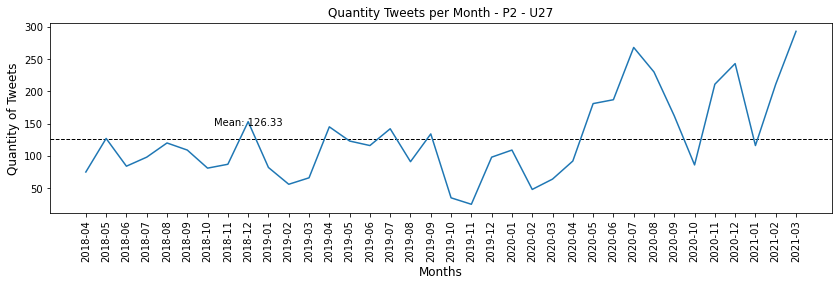

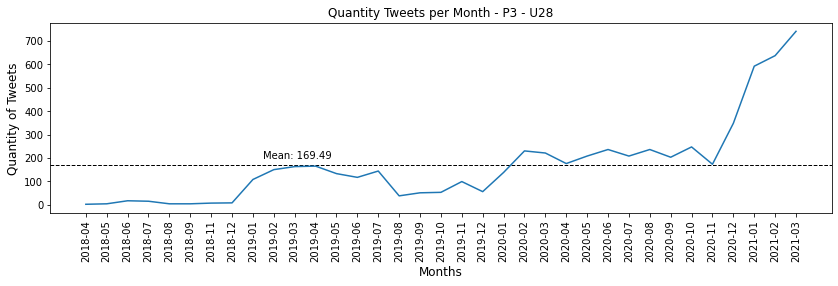

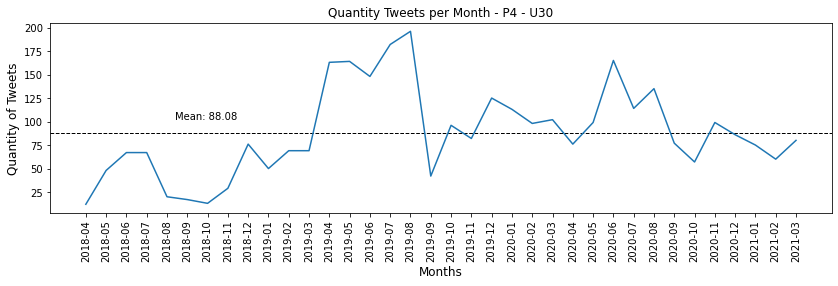

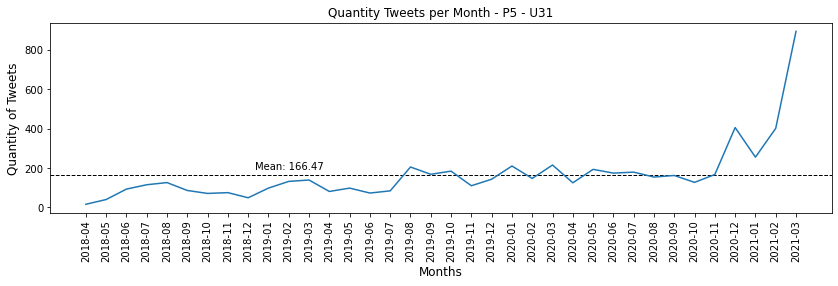

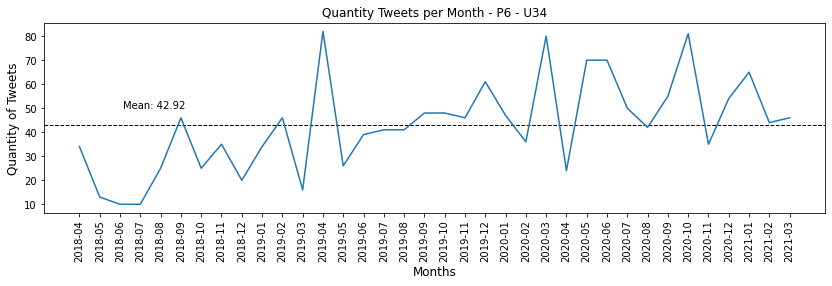

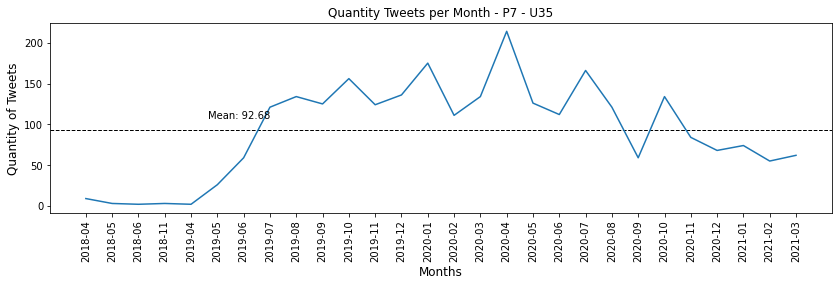

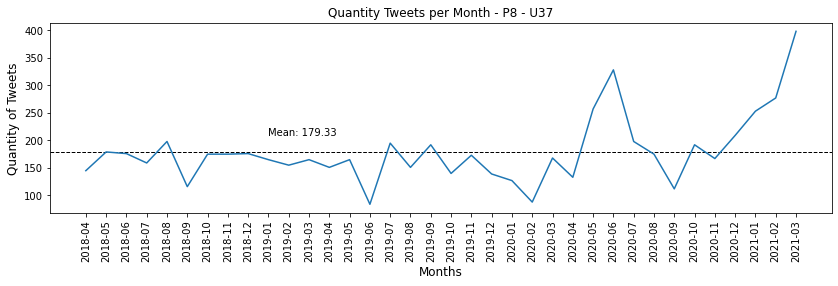

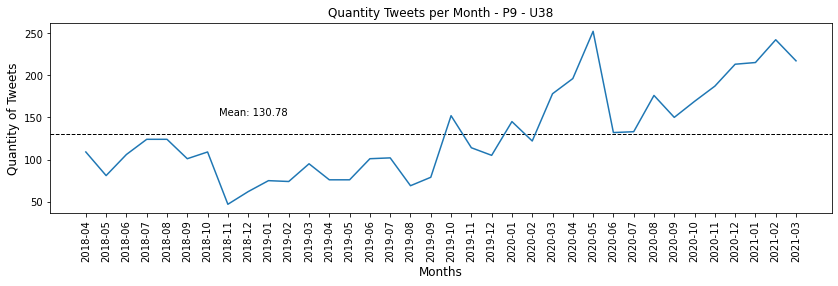

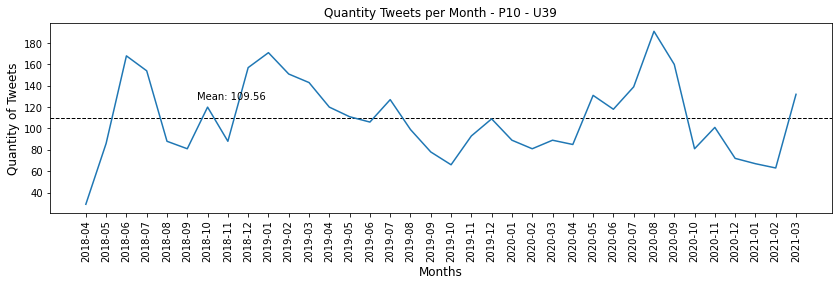

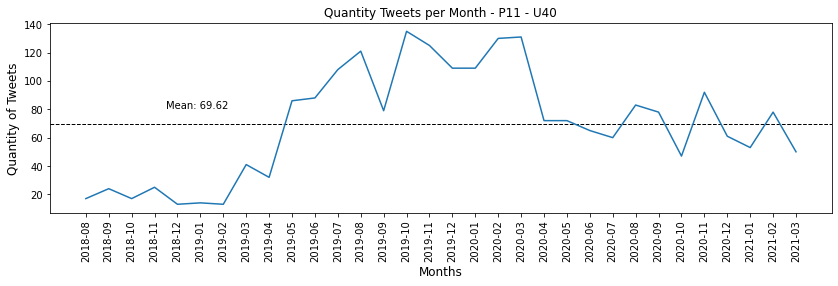

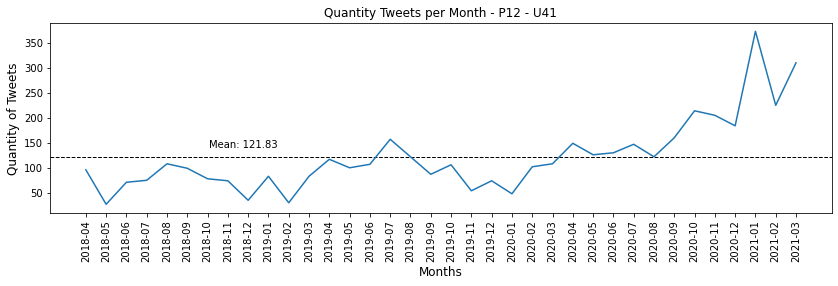

In [71]:
count = 1
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)

        tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
        tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)

        df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

        df_result = pd.DataFrame(df["text"])
        df_result["YearMonth"] = list(df_result.index)

        create_line_plot(df_result, id_user, count)
#         create_histogram(df_result, id_user, count)
        count += 1

In [18]:
def totalize_data_by_month():
    df_result_all = {}
    all_df = []

    for c in data:
        id_user = c
        if data[id_user]['bigfive']:
            tweets_pd = create_tweets_pd(data, id_user)
            tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
            tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)

            df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

            df_result = pd.DataFrame(df["text"])
            df_result["YearMonth"] = list(df_result.index)
            df_result_all = dict.fromkeys(list(df_result.index), 0)
            all_df.append(df_result)

    for d in df_result_all:
        for a in all_df:
            temp_df = a.loc[a['YearMonth']== d]
            if len(temp_df['text']) > 0:
                df_result_all[d] = df_result_all[d] + temp_df['text'][0]

    df_res = pd.DataFrame.from_records([df_result_all])
    df_res = df_res.transpose()
    return df_res

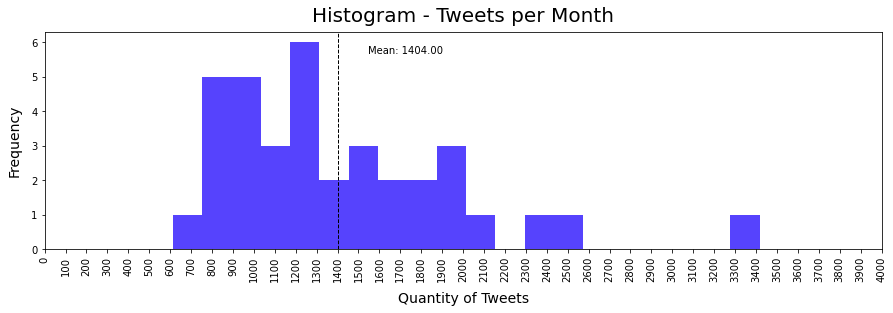

In [80]:
# HISTOGRAM OF TOTAL TWEETS, GROUPED BY MONTH

df = totalize_data_by_month()

fig = plt.figure(figsize=(15,4))

n, bins, patches = plt.hist(df, bins=20, color='#5643fd')

plt.xticks(np.arange(0, 4001, 100), rotation = 'vertical')

plt.axvline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.title('Histogram - Tweets per Month', fontsize=20, pad=10)
plt.xlabel('Quantity of Tweets', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)

plt.show()

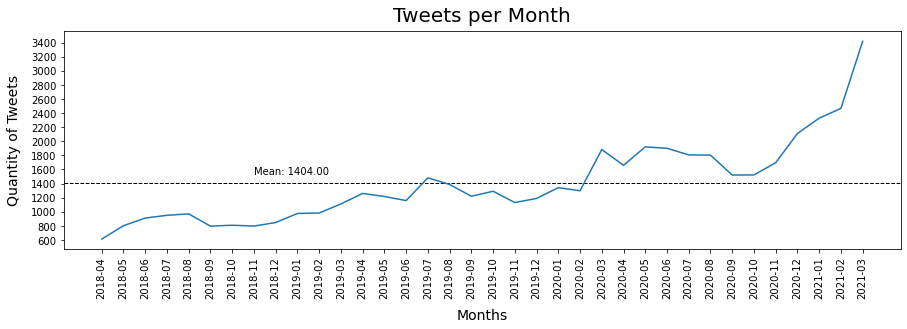

In [82]:
tickvalues = range(0,len(df.index))

fig = plt.figure(figsize=(15,4))

plt.xticks(ticks = tickvalues ,labels = df.index, rotation = 'vertical')
plt.yticks(np.arange(0, 5000, 200))

plt.title("Tweets per Month", fontsize=20, pad=10)
plt.ylabel("Quantity of Tweets", fontsize=14, labelpad=10)
plt.xlabel("Months", fontsize=14, labelpad=10)

plt.axhline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*0.005, max_ylim*0.32, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.plot(df)

In [21]:
all_tweets

,created_at,id_user,final_score,final_polarity,Participant
0,2021-03-31T19:13:28,26,-0.114700,neg,1
1,2021-03-31T12:28:56,26,0.000000,neu,1
2,2021-03-31T12:17:06,26,0.308058,pos,1
3,2021-03-31T11:46:04,26,-0.103292,neg,1
4,2021-03-30T17:58:24,26,-0.232700,neg,1
...,...,...,...,...,...
4381,2020-09-04T19:40:56,41,-0.074000,neg,12
4382,2020-09-04T19:35:06,41,-0.073408,neg,12
4383,2021-03-23T14:53:48,41,0.208975,pos,12
4384,2021-02-06T23:41:36,41,0.452750,pos,12


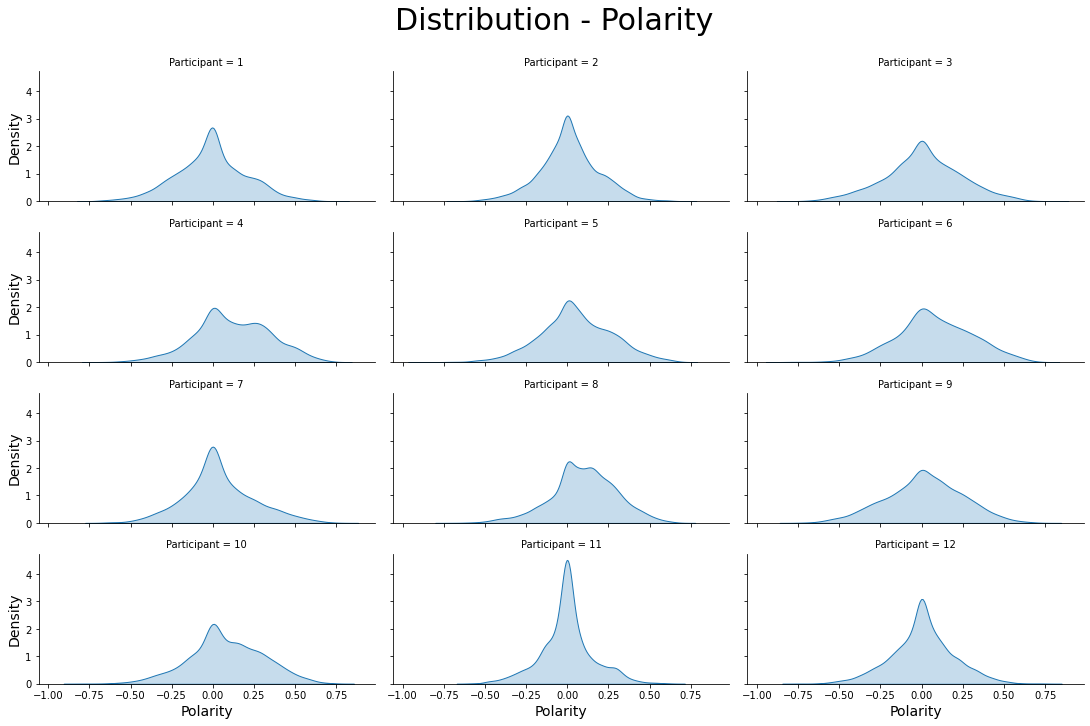

In [22]:
g = sns.FacetGrid(all_tweets, col="Participant", col_wrap=3)
g.fig.set_size_inches(15,10)
g.fig.suptitle('Distribution - Polarity', fontsize=30, y=1)
g.map(sns.kdeplot, "final_score", fill=True, palette="crest")
g.set_axis_labels("Polarity", 'Density', fontsize=14)

xl = ''
yl = ''

for ax in g.axes:
    xlabel = ax.xaxis.get_label_text()
    if xlabel:
        xl = xlabel
    ylabel = ax.yaxis.get_label_text()
    if ylabel:
        yl = ylabel

        
for ax in g.axes:
    xlabel = ax.xaxis.get_label_text()
    if not xlabel:
        ax.xaxis.set_label_text(xl)
    ylabel = ax.yaxis.get_label_text()
    if not ylabel:
        ax.yaxis.set_label_text(yl)
        

In [23]:
bar_chart_data

[['P1', -0.00996752618499402, -0.011672802631334233],
 ['P2', 0.011344290622251552, 0.013467458561733245],
 ['P3', 0.009870767768037766, 0.010977389276340463],
 ['P4', 0.11799876781456964, 0.13207698296505482],
 ['P5', 0.05304767950558983, 0.05753071720539266],
 ['P6', 0.07942946106796114, 0.08854149880952379],
 ['P7', 0.036478940077071365, 0.04471556424185177],
 ['P8', 0.09860962952447339, 0.1096492883585946],
 ['P9', 0.01495653911427359, 0.01602170333333335],
 ['P10', 0.08113262401115626, 0.09339961152948052],
 ['P11', -0.0017613999326750438, -0.0025784487844940853],
 ['P12', 0.005346729195166437, 0.0064691735862068955]]

In [24]:
all_tweets

,created_at,id_user,final_score,final_polarity,Participant
0,2021-03-31T19:13:28,26,-0.114700,neg,1
1,2021-03-31T12:28:56,26,0.000000,neu,1
2,2021-03-31T12:17:06,26,0.308058,pos,1
3,2021-03-31T11:46:04,26,-0.103292,neg,1
4,2021-03-30T17:58:24,26,-0.232700,neg,1
...,...,...,...,...,...
4381,2020-09-04T19:40:56,41,-0.074000,neg,12
4382,2020-09-04T19:35:06,41,-0.073408,neg,12
4383,2021-03-23T14:53:48,41,0.208975,pos,12
4384,2021-02-06T23:41:36,41,0.452750,pos,12


In [25]:
df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : [],
            'O': [],
            'C': [],
            'E': [],
            'A': [],
            'N': []
          }

for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)
        vader_df = tweets_pd[['id_user', 'final_score', 'final_polarity']].copy()
        qtd_pos = vader_df.query('final_polarity == "pos"')['id_user'].count()
        qtd_neu = vader_df.query('final_polarity == "neu"')['id_user'].count()
        qtd_neg = vader_df.query('final_polarity == "neg"')['id_user'].count()
        qtd_total = vader_df['final_polarity'].count()
        df_dict['id_user'].append(id_user)
        df_dict['pos'].append(qtd_pos)
        df_dict['neu'].append(qtd_neu)
        df_dict['neg'].append(qtd_neg)
        df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
        df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
        df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
        df_dict['mean'].append(vader_df['final_score'].mean())
        for b in data[id_user]['bigfive']:
            df_dict['O'].append(b[1])
            df_dict['C'].append(b[2])
            df_dict['E'].append(b[3])
            df_dict['A'].append(b[4])
            df_dict['N'].append(b[5])

df_chart = pd.DataFrame(df_dict)
df_chart

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N
0,26,1991,736,2311,39.519651,14.608972,45.871378,-0.009968,37,43,36,24,26
1,27,2009,717,1822,44.173263,15.765172,40.061566,0.011344,41,43,34,22,23
2,28,2774,598,2560,46.763318,10.080917,43.155765,0.009871,43,46,31,24,15
3,30,2016,338,817,63.576159,10.659098,25.764743,0.117999,17,33,33,22,39
4,31,3342,467,2184,55.765059,7.792424,36.442516,0.053048,22,33,31,20,8
5,34,890,159,496,57.605178,10.291262,32.103560,0.079429,35,35,32,26,16
6,35,1170,478,947,45.086705,18.420039,36.493256,0.036479,29,45,34,35,29
7,37,4284,650,1522,66.356877,10.068154,23.574969,0.098610,40,46,38,22,21
8,38,2369,313,2026,50.318607,6.648258,43.033135,0.014957,32,46,19,18,28
9,39,2256,518,1170,57.200811,13.133874,29.665314,0.081133,31,36,25,33,21


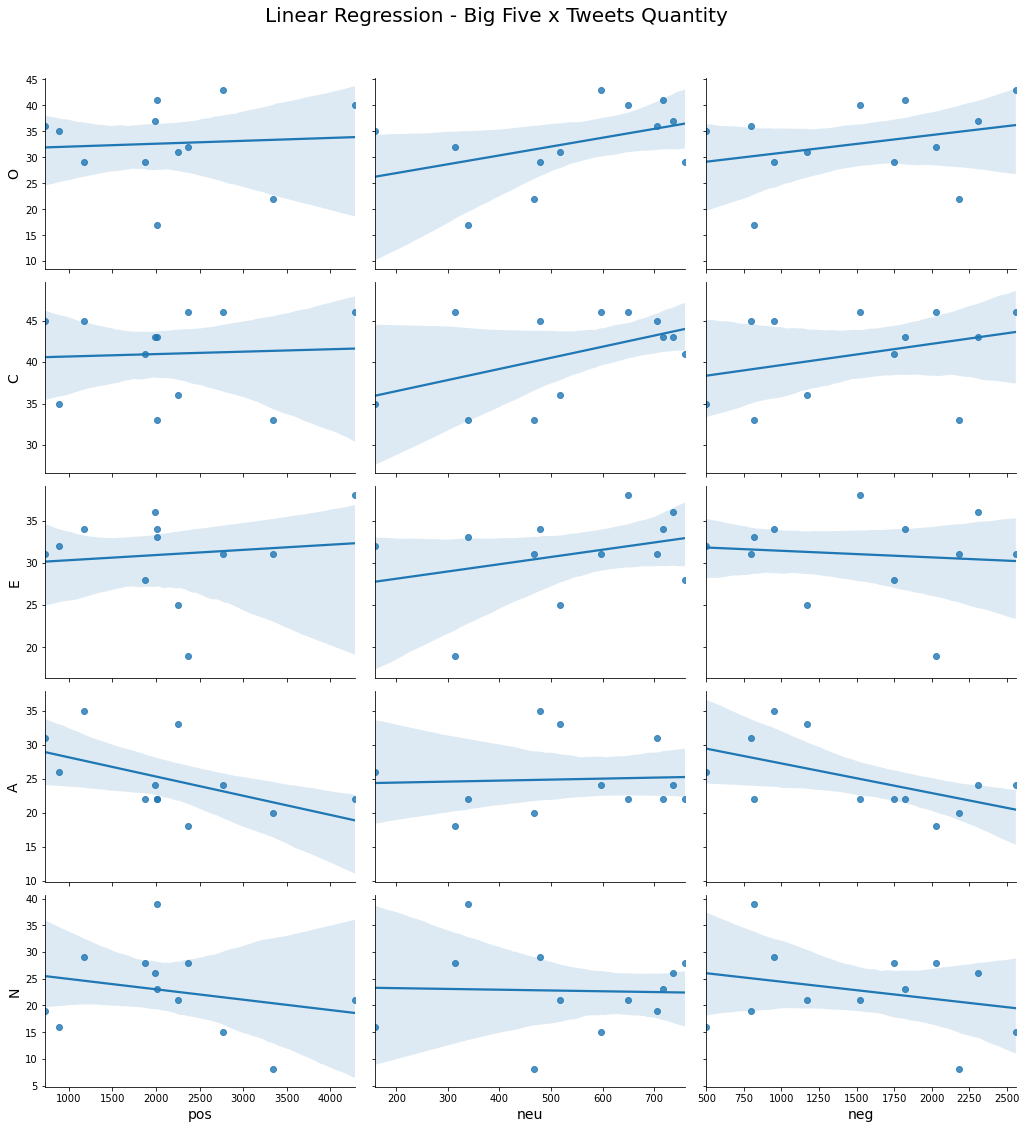

In [83]:
g = sns.pairplot(data=df_chart, x_vars=['pos', 'neu', 'neg'], y_vars=['O','C','E','A','N'], kind='reg')
g.fig.set_size_inches(15,15)
g.fig.suptitle('Linear Regression - Big Five x Tweets Quantity', fontsize=20, y=1.05)

for ax in g.axes:
    for a in ax:
        a.set_ylabel(a.get_ylabel(), fontsize=14)
        a.set_xlabel(a.get_xlabel(), fontsize=14)

In [31]:
count = 1
all_df = pd.DataFrame()
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)
        df = pd.DataFrame(tweets_pd)
        del df['text']
        del df['vader_sentiment_analysis_score']
        del df['vader_sentiment_analysis_polarity']
        del df['oplexicon_sentiment_analysis_score']
        del df['oplexicon_sentiment_analysis_polarity']
        del df['sentistrength_sentiment_analysis_score']
        del df['sentistrength_sentiment_analysis_polarity']
        del df['sentilexpt_sentiment_analysis_score']
        del df['sentilexpt_sentiment_analysis_polarity']

        df = df.sort_values(by='created_at')

        df["created_at"] = pd.to_datetime(df["created_at"])
        df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
        df.set_index(df["date_minus_time"],inplace=True)

        df_pos = df.query("final_polarity == 'pos'")
        df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())
    #     df_pos['polarity'] = ["pos" for i in df_pos['final_score']]


        df_neg = df.query("final_polarity == 'neg'")
        df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())
    #     df_pos['polarity'] = ["neg" for i in df_neg['final_score']]

        df_final = df_pos.append(df_neg)
        df_final = df_final.fillna(0)
    #     df_final.columns = ['final_score_pos', 'final_score_neg']

    #     df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
        df_final['id_user'] = id_user
        df_final['date'] = df_final.index
        df_final = df_final.reset_index(drop=True)

        df_final.sort_values(by=['date'])
        df_final['Participant'] = count

        if all_df.empty:
            all_df = df_final
        else:
            all_df = all_df.append(df_final)

    #     plot_point_chart_pos_neg(df_final, count, id_user)


        count += 1
    

all_df['pol'] = np.where(all_df['final_score'] > 0, 'pos', np.where(all_df['final_score'] < 0, 'neg', 'neu'))
all_df

,final_score,id_user,date,Participant,pol
0,0.172350,26,2018-04-02,1,pos
1,0.000000,26,2018-04-03,1,neu
2,0.247928,26,2018-04-04,1,pos
3,0.042875,26,2018-04-05,1,pos
4,0.256600,26,2018-04-06,1,pos
...,...,...,...,...,...
2185,-0.166916,41,2021-03-27,12,neg
2186,-0.216860,41,2021-03-28,12,neg
2187,-0.142164,41,2021-03-29,12,neg
2188,-0.130029,41,2021-03-30,12,neg


In [32]:
mean_df = all_df.groupby(['Participant', 'id_user', 'date'], as_index=False)['final_score'].mean()
mean_df['pol'] = 'mean'
mean_df = mean_df[['final_score','id_user','date','Participant','pol']]
mean_df

,final_score,id_user,date,Participant,pol
0,0.079725,26,2018-04-02,1,mean
1,-0.132175,26,2018-04-03,1,mean
2,0.012346,26,2018-04-04,1,mean
3,0.021437,26,2018-04-05,1,mean
4,0.089608,26,2018-04-06,1,mean
...,...,...,...,...,...
12962,0.074568,41,2021-03-27,12,mean
12963,-0.005290,41,2021-03-28,12,mean
12964,0.011727,41,2021-03-29,12,mean
12965,-0.007524,41,2021-03-30,12,mean


In [29]:
# all_df = all_df.append(mean_df)
# all_df

,final_score,id_user,date,Participant,pol
0,0.172350,26,2018-04-02,1,pos
1,0.000000,26,2018-04-03,1,neu
2,0.247928,26,2018-04-04,1,pos
3,0.042875,26,2018-04-05,1,pos
4,0.256600,26,2018-04-06,1,pos
...,...,...,...,...,...
12962,0.074568,41,2021-03-27,12,mean
12963,-0.005290,41,2021-03-28,12,mean
12964,0.011727,41,2021-03-29,12,mean
12965,-0.007524,41,2021-03-30,12,mean


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


[None, None]

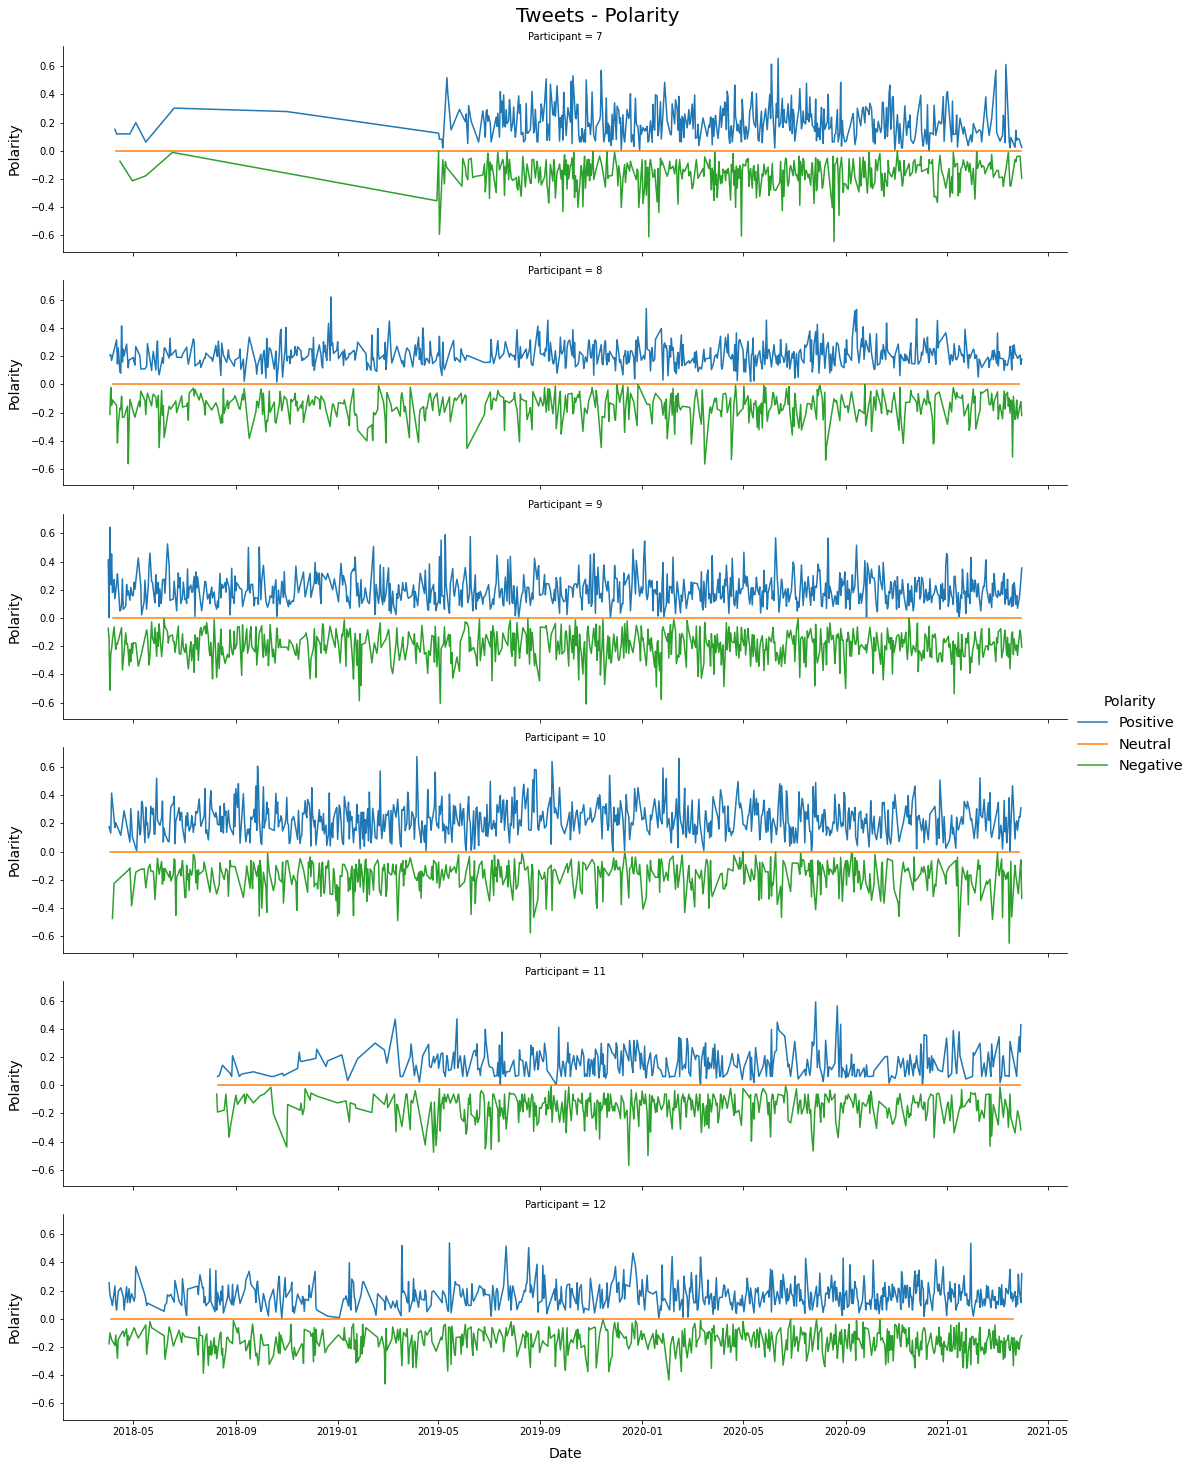

In [111]:
g = sns.FacetGrid(all_df.query("Participant > 6"), row="Participant", hue='pol', legend_out=True)
g.fig.set_size_inches(15,20)
g.map(sns.lineplot, 'date', "final_score")

g.fig.suptitle('Tweets - Polarity', fontsize=20, y=1.01)
g.set_axis_labels("Date", 'Polarity', fontsize=14)
        
for ax in g.axes:
    for a in ax:
        a.set_ylabel("Polarity", fontsize=14, labelpad=10)
        a.set_xlabel("Date", fontsize=14, labelpad=10)
        
g.add_legend(fontsize='x-large', title="Polarity", labels=['Positive', 'Neutral', 'Negative'])
plt.setp(g._legend.get_title(), fontsize=14)

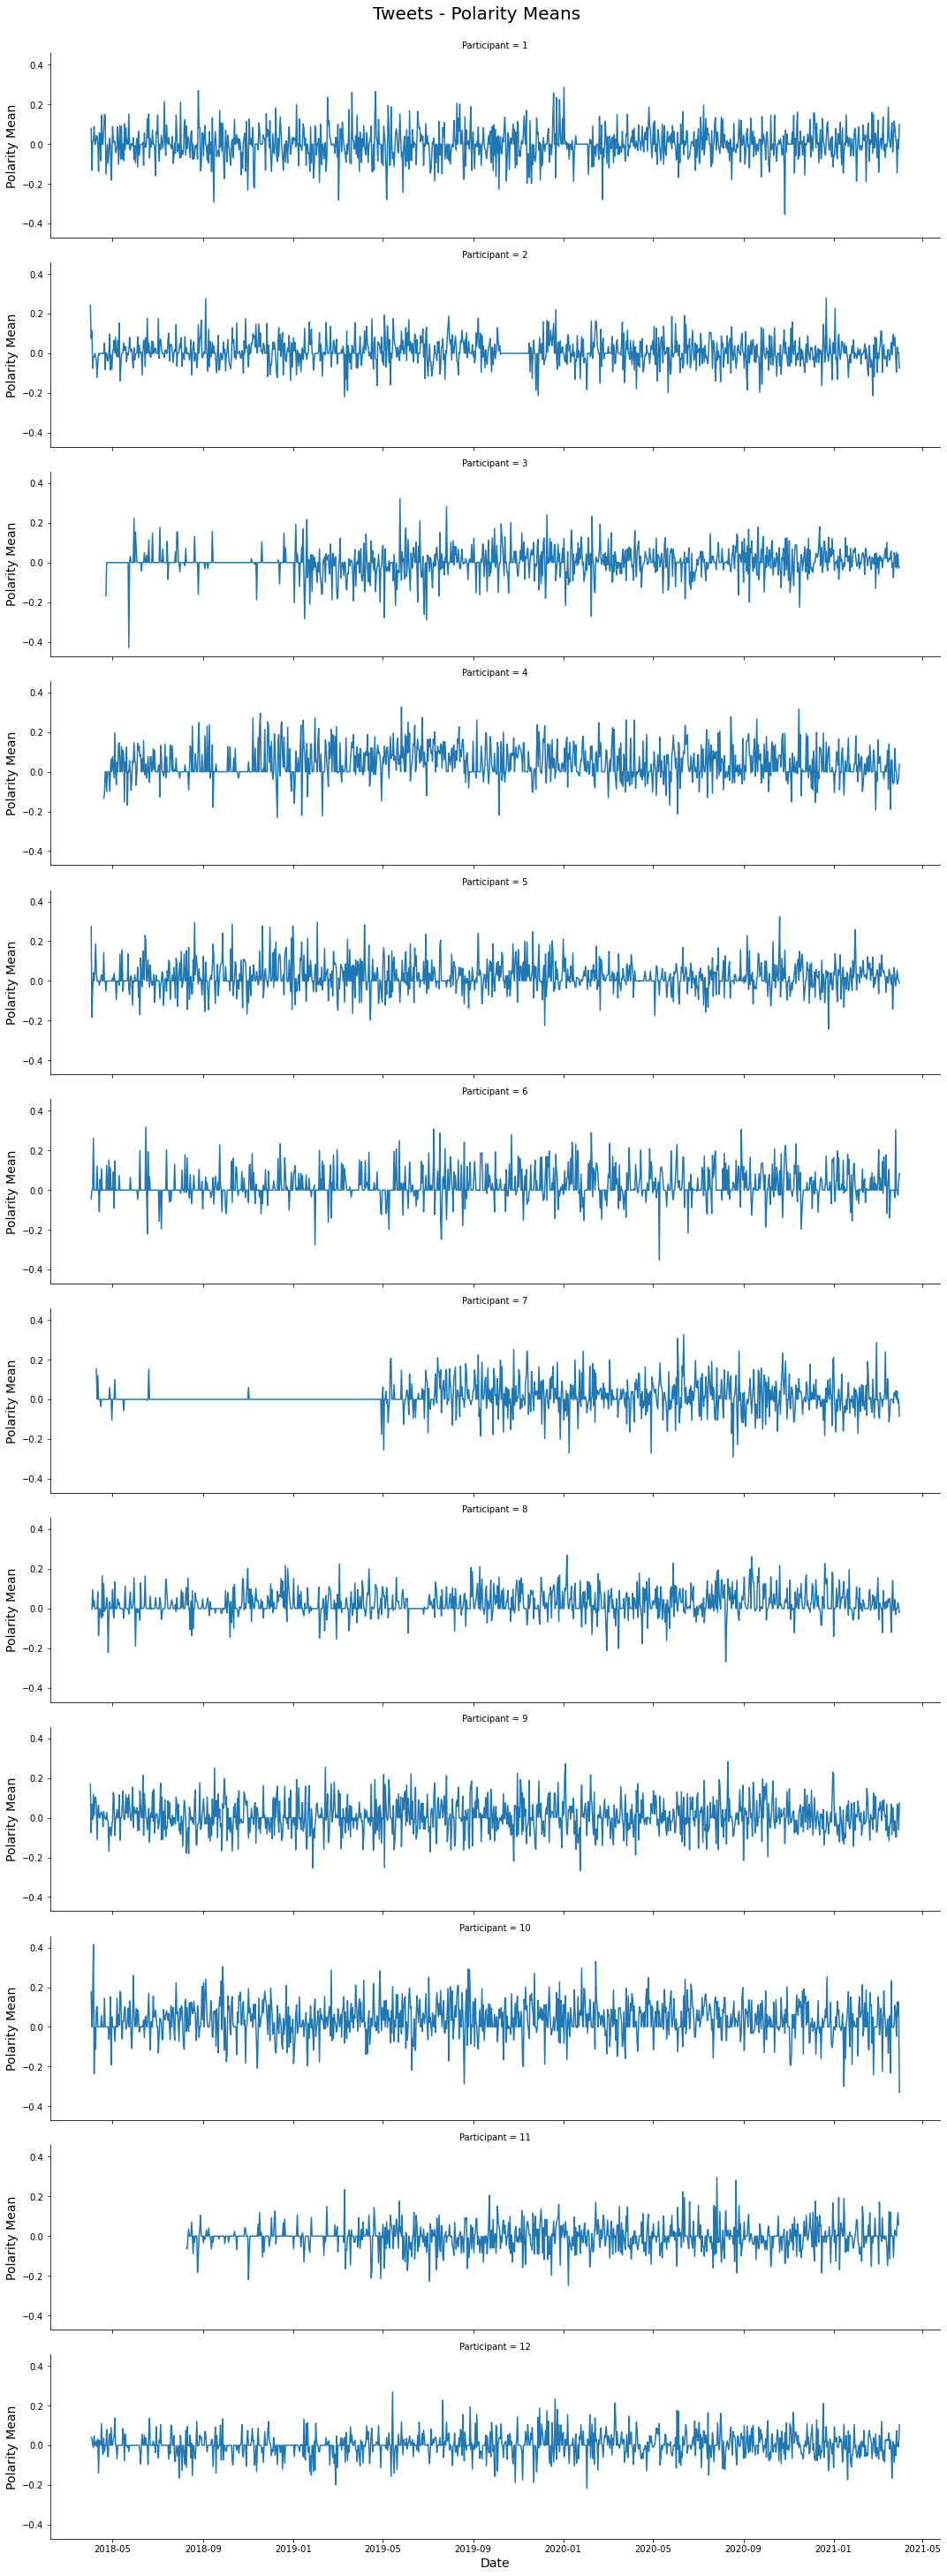

In [34]:
g = sns.FacetGrid(mean_df, row="Participant")
g.fig.set_size_inches(15,40)
g.map(sns.lineplot, 'date', "final_score")

g.fig.suptitle('Tweets - Polarity Means', fontsize=20, y=1.01)
g.set_axis_labels("Date", 'Polarity Mean', fontsize=14)
        
for ax in g.axes:
    for a in ax:
        a.set_ylabel("Polarity Mean", fontsize=14)
        a.set_xlabel("Date", fontsize=14)

In [51]:
all_tweets['final_score'].describe()

count    50544.000000
mean         0.039885
std          0.215386
min         -0.851526
25%         -0.084819
50%          0.009333
75%          0.177208
max          0.768890
Name: final_score, dtype: float64

[Text(0, 1, '')]

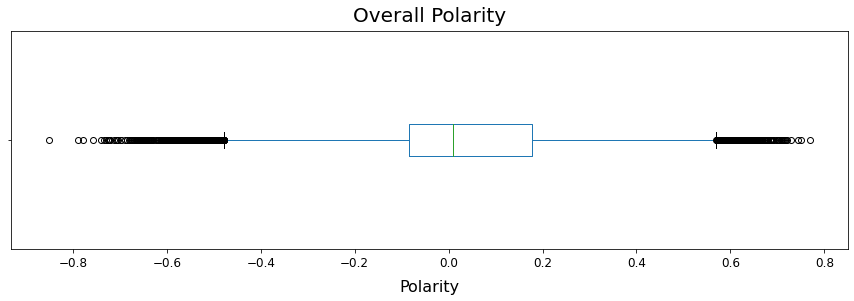

In [63]:
bplot = all_tweets.boxplot(column=['final_score'], grid=False, figsize=(15,4), vert=False)
# y_range = range(0,4501, 500)

bplot.axes.set_title("Overall Polarity", fontsize=20, pad = 10)
 
bplot.set_xlabel("Polarity", fontsize=16, labelpad=10) 
# bplot.set_ylabel("Quantity of Tweets", fontsize=16, labelpad=10)
# bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_yticklabels([''])